In [15]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))
import scipy

In [16]:
path='/Users/stella/Desktop/'
date_0=datetime.date(2017,4,14)
date_1=datetime.date(2017,7,1)

In [17]:
#april         3783
apr_3783=pd.read_excel(path+'queens-data/Queens Data Logger TSI 3783 Ultrafine February to April.xls')[1:-8]
apr_3783['Date&Time']=apr_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

#may-june      3783
may_jun_3783=pd.read_csv(path+'queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_3783 = may_jun_3783.rename(columns=may_jun_3783.iloc[1])
may_jun_3783 = may_jun_3783[3:]
may_jun_3783=may_jun_3783[['Date&Time','UF Aggregated Conc.']]
may_jun_3783['Date&Time']=may_jun_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

tsi_3783=pd.concat([apr_3783,may_jun_3783])

tsi_3783['UF Aggregated Conc.']=pd.to_numeric(tsi_3783['UF Aggregated Conc.'], errors='coerce')
tsi_3783=tsi_3783[(tsi_3783['Date&Time']>date_0) & (tsi_3783['Date&Time']<date_1)]
tsi_3783=tsi_3783.reset_index()
del tsi_3783['index']

tsi_3783.columns=['time','PN (#/cm3)']

In [18]:
#april         3031
apr_3031=pd.read_csv(path+'queens-data/TSI 3031 Particle Counter_20170413-april.TXT',delimiter='\t',skiprows=4)
apr_3031=apr_3031.reset_index()
apr_3031.columns=apr_3031.iloc[0]
apr_3031=apr_3031.iloc[1:].reset_index()
apr_3031['start']=apr_3031['start'].apply(lambda x: parse(x))
apr_3031['end']=apr_3031['end'].apply(lambda x: parse(x))
apr_3031=apr_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

#may-june      3031
may_jun_3031=pd.read_csv(path+'queens-data/TSI 3031_20170501.TXT',delimiter='\t',skiprows=4)
may_jun_3031=may_jun_3031.reset_index()
may_jun_3031.columns=may_jun_3031.iloc[0]
may_jun_3031=may_jun_3031.iloc[1:].reset_index()
may_jun_3031['start']=may_jun_3031['start'].apply(lambda x: parse(x))
may_jun_3031['end']=may_jun_3031['end'].apply(lambda x: parse(x))
may_jun_3031=may_jun_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

tsi_3031=pd.concat([apr_3031,may_jun_3031])

tsi_3031=tsi_3031[(tsi_3031['start']>date_0) & (tsi_3031['start']<date_1)]
tsi_3031=tsi_3031.reset_index()
del tsi_3031['index']
tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']] = tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']].apply(pd.to_numeric)

In [180]:
# TEOM APRIL and JUNE - MAY INVALIDATED
teom_apr=pd.read_csv(path+'queens-data/1405DF TEOM_A225741308_2017-04-28_16-07-18-mar-apr.csv')
teom_apr=teom_apr[['Date','Time','tmoTEOMAFEMMC_0']]
teom_apr['datetime']=teom_apr['Date']+' '+teom_apr['Time']
teom_apr['datetime']=teom_apr['datetime'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M:%S'))
teom_apr=teom_apr[['datetime','tmoTEOMAFEMMC_0']]
teom_apr=teom_apr.rename(columns={'tmoTEOMAFEMMC_0':'PM2.5 (ug/m3)'})
teom_apr=teom_apr[(teom_apr['datetime']>=datetime.date(2017,4,1)) & (teom_apr['datetime']<datetime.date(2017,5,1))]

teom_jun=pd.read_csv(path+'data-2/TEOM_TSI 3783_May-June_2017.csv')[1:-9]
teom_jun=teom_jun.rename(columns={'﻿Date&Time':'time'})
teom_jun=teom_jun[['time','PM2.5_FEM_MC']]
teom_jun['time']=teom_jun['time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))
teom_jun['PM2.5_FEM_MC']=pd.to_numeric(teom_jun['PM2.5_FEM_MC'], errors='coerce')
#teom2=teom2[teom2['PM2.5_FEM_MC']>0]
teom_jun=teom_jun.reset_index()
del teom_jun['index']
teom_jun=teom_jun[(teom_jun['time']>=datetime.date(2017,6,1)) & (teom_jun['time']<datetime.date(2017,7,1))]
teom_jun=teom_jun.rename(columns={'time':'datetime','PM2.5_FEM_MC':'PM2.5 (ug/m3)'})

teom=pd.concat([teom_apr,teom_jun])
num=teom._get_numeric_data()
num[num<=0]=np.nan

In [181]:
# PEGASOR INDOOR AND OUTDOOR DATA
i_ldsa=pd.read_excel(path+'data-2/realeco_sn0135-ldsa_2017-01-23t181000_2017-07-01t181000.xlsx')
i_ldsa=i_ldsa.set_index('time')
i_pn=pd.read_excel(path+'data-2/realeco_sn0135-pm25_2017-01-19t181600_2017-07-01t181600.xlsx')
i_pn=i_pn.set_index('time')
i_pm25=pd.read_excel(path+'data-2/realeco_sn0135-pn_2017-01-25t183900_2017-07-01t183900.xlsx')
i_pm25=i_pm25.set_index('time')

i_df=(i_ldsa.join(i_pn)).join(i_pm25).dropna()
i_df.columns=['i-ldsa','i-pm25','i-pn']

urban=pd.read_csv(path+'data-2/1329_PEGASOR A_20170712185105-2.csv',delimiter=',')
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))
urban.columns=['time','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2']
urban['pn-1'].loc[:80034]=urban['pn-1'].loc[:80034]*6
urban['pn-2'].loc[:80033]=urban['pn-2'].loc[:80033]*6
urban=urban.set_index('time')

pegasor=i_df.join(urban).reset_index()

pegasor=pegasor[(pegasor['time']>date_0) & (pegasor['time']<date_1)]
pegasor=pegasor[pegasor>0].dropna().reset_index()
pegasor=pegasor.reset_index()
del pegasor['index']
del pegasor['level_0']

/Users/stella/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [182]:
# compare urban 1, urban 2 differences
pegasor['ldsa-1/2']=pegasor['ldsa-1']/pegasor['ldsa-2']
pegasor['ldsa-2/1']=pegasor['ldsa-2']/pegasor['ldsa-1']

# remove pegasor urban units +5x each other
pegasor=pegasor[pegasor['ldsa-2/1']<5]
pegasor=pegasor[pegasor['ldsa-1/2']<5].reset_index()
del pegasor['index'], pegasor['ldsa-1/2'], pegasor['ldsa-2/1']

In [183]:
tsi3783_hr=tsi_3783.set_index('time').resample(rule='1H').mean().reset_index()
tsi3783_daily=tsi_3783.set_index('time').resample(rule='24H').mean().reset_index()

tsi3031_hr=tsi_3031.set_index('start').resample(rule='1H').mean().reset_index()
tsi3031_daily=tsi_3031.set_index('start').resample(rule='24H').mean().reset_index()

teom_hr=teom.set_index('datetime').resample(rule='1H').mean().reset_index()
teom_daily=teom.set_index('datetime').resample(rule='24H').mean().reset_index()

pegasor_hr=pegasor.set_index('time').resample(rule='1H').mean().reset_index()
pegasor_daily=pegasor.set_index('time').resample(rule='24H').mean().reset_index()

In [184]:
df_hr=pegasor_hr.set_index('time').join(tsi3783_hr.set_index('time')).join(tsi3031_hr.set_index('start')).join(teom_hr.set_index('datetime')).reset_index()
df_daily=pegasor_daily.set_index('time').join(tsi3783_daily.set_index('time')).join(tsi3031_daily.set_index('start')).join(teom_daily.set_index('datetime')).reset_index()

In [224]:
df_hr_apr=df_hr[df_hr.time<datetime.date(2017,5,1)]                                                       # APR
df_hr_may=df_hr[(df_hr.time>=datetime.date(2017,5,1)) & (df_hr.time<datetime.date(2017,6,1))]             # MAY
df_hr_jun=df_hr[df_hr.time>=datetime.date(2017,6,1)]                                                      # JUN

df_daily_apr=df_daily[df_daily.time<datetime.date(2017,5,1)]                                              # APR
df_daily_may=df_daily[(df_daily.time>=datetime.date(2017,5,1)) & (df_daily.time<datetime.date(2017,6,1))] # MAY
df_daily_jun=df_daily[df_daily.time>=datetime.date(2017,6,1)]                                             # JUN

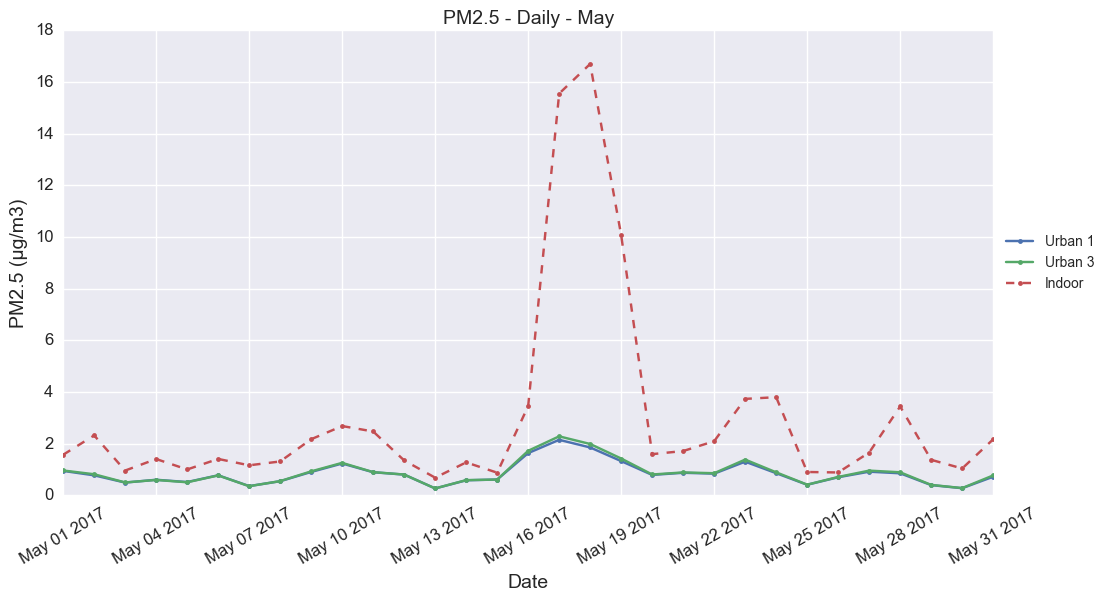

In [243]:
calib=df_daily_may['PM2.5 (ug/m3)'].mean()/df_daily_may['pm25-1'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_daily_may['time'],df_daily_may['pm25-1'],'.-',label='Urban 1')
plt.plot(df_daily_may['time'],df_daily_may['pm25-2'],'.-',label='Urban 3')
plt.plot(df_daily_may['time'],df_daily_may['i-pm25'],'.--',label='Indoor')
#plt.plot(df_daily_may['time'],df_daily_may['PM2.5 (ug/m3)'],'.-',label='TEOM')
plt.title('PM2.5 - Daily - May',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (μg/m3)',fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

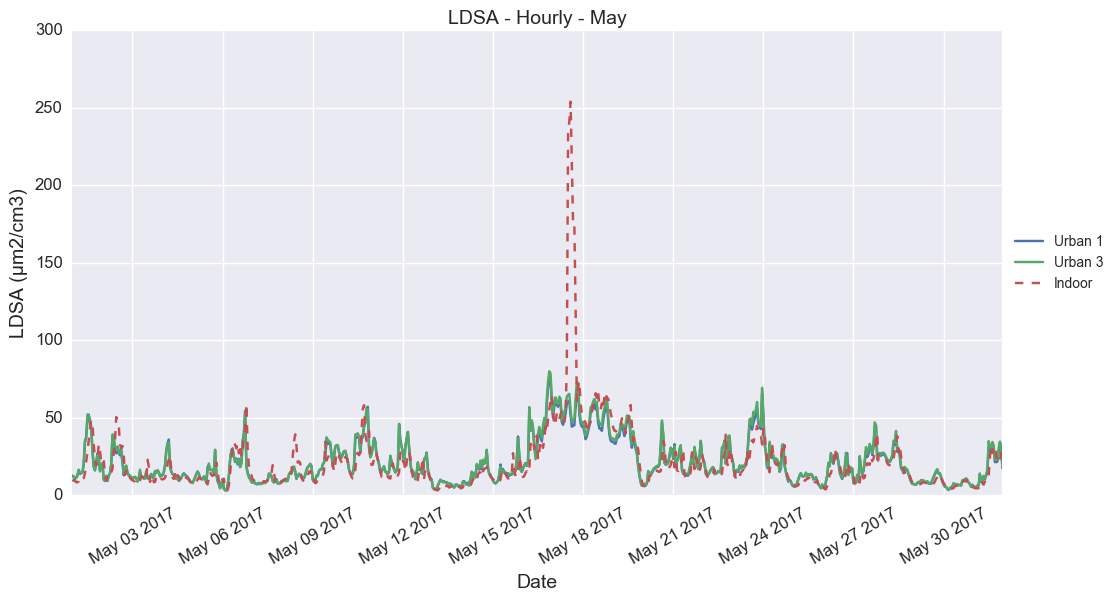

In [244]:
calib=df_hr_may['ldsa-1'].mean()/df_hr_may['i-ldsa'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_hr_may['time'],df_hr_may['ldsa-1'],'-',label='Urban 1')
plt.plot(df_hr_may['time'],df_hr_may['ldsa-2'],'-',label='Urban 3')
plt.plot(df_hr_may['time'],df_hr_may['i-ldsa']*calib,'--',label='Indoor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('LDSA - Hourly - May',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('LDSA (μm2/cm3)',fontsize=14)

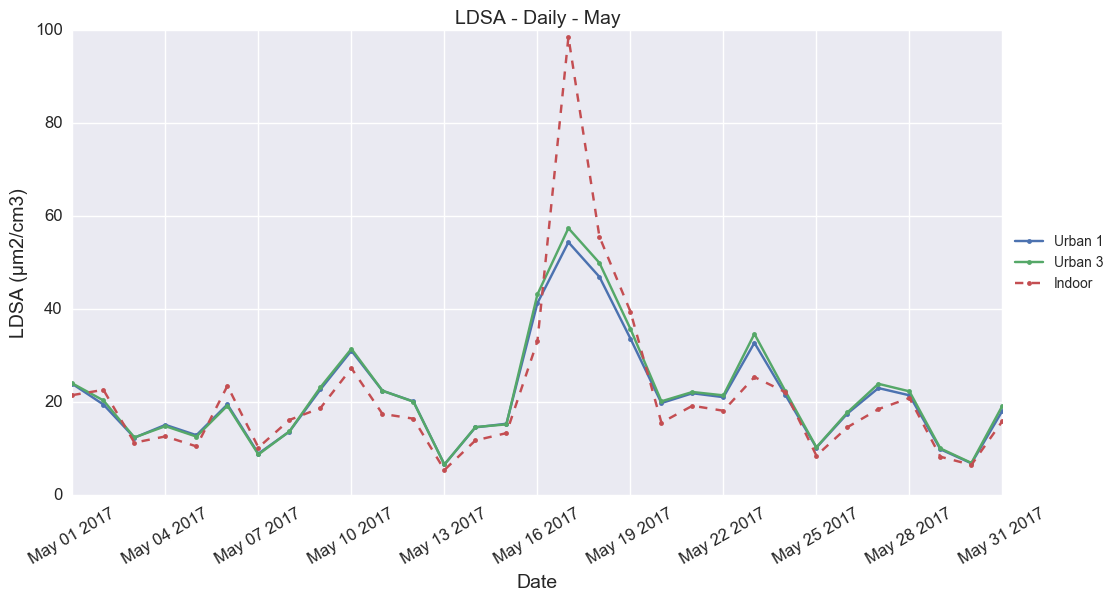

In [245]:
calib=df_daily_may['ldsa-1'].mean()/df_daily_may['i-ldsa'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_daily_may['time'],df_daily_may['ldsa-1'],'.-',label='Urban 1')
plt.plot(df_daily_may['time'],df_daily_may['ldsa-2'],'.-',label='Urban 3')
plt.plot(df_daily_may['time'],df_daily_may['i-ldsa']*calib,'.--',label='Indoor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('LDSA - Daily - May',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('LDSA (μm2/cm3)',fontsize=14)

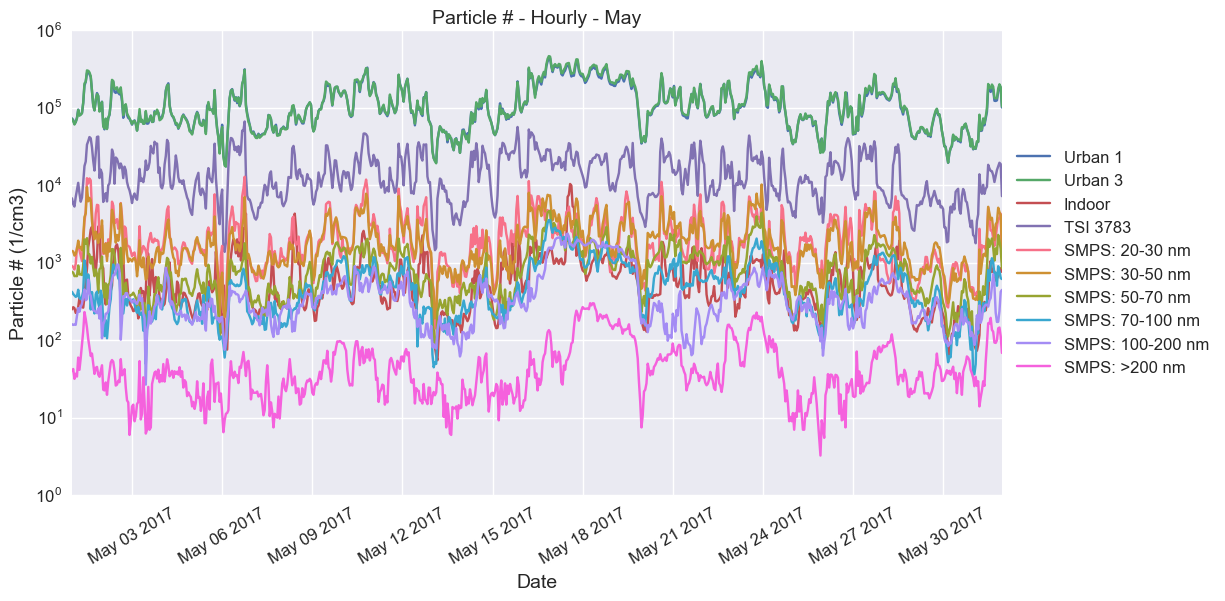

In [246]:
plt.figure(figsize=(12,6))
plt.semilogy(df_hr_may['time'],df_hr_may['pn-1'],label='Urban 1')
plt.semilogy(df_hr_may['time'],df_hr_may['pn-2'],label='Urban 3')
plt.semilogy(df_hr_may['time'],df_hr_may['i-pn'],label='Indoor')
plt.semilogy(df_hr_may['time'],df_hr_may['PN (#/cm3)'],label='TSI 3783')
plt.semilogy(df_hr_may['time'],df_hr_may['ch1'],color=colorz[0],label='SMPS: 20-30 nm')
plt.semilogy(df_hr_may['time'],df_hr_may['ch2'],color=colorz[1],label='SMPS: 30-50 nm')
plt.semilogy(df_hr_may['time'],df_hr_may['ch3'],color=colorz[2],label='SMPS: 50-70 nm')
plt.semilogy(df_hr_may['time'],df_hr_may['ch4'],color=colorz[5],label='SMPS: 70-100 nm')
plt.semilogy(df_hr_may['time'],df_hr_may['ch5'],color=colorz[6],label='SMPS: 100-200 nm')
plt.semilogy(df_hr_may['time'],df_hr_may['ch6'],color=colorz[7],label='SMPS: >200 nm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Particle # - Hourly - May',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Particle # (1/cm3)',fontsize=14)

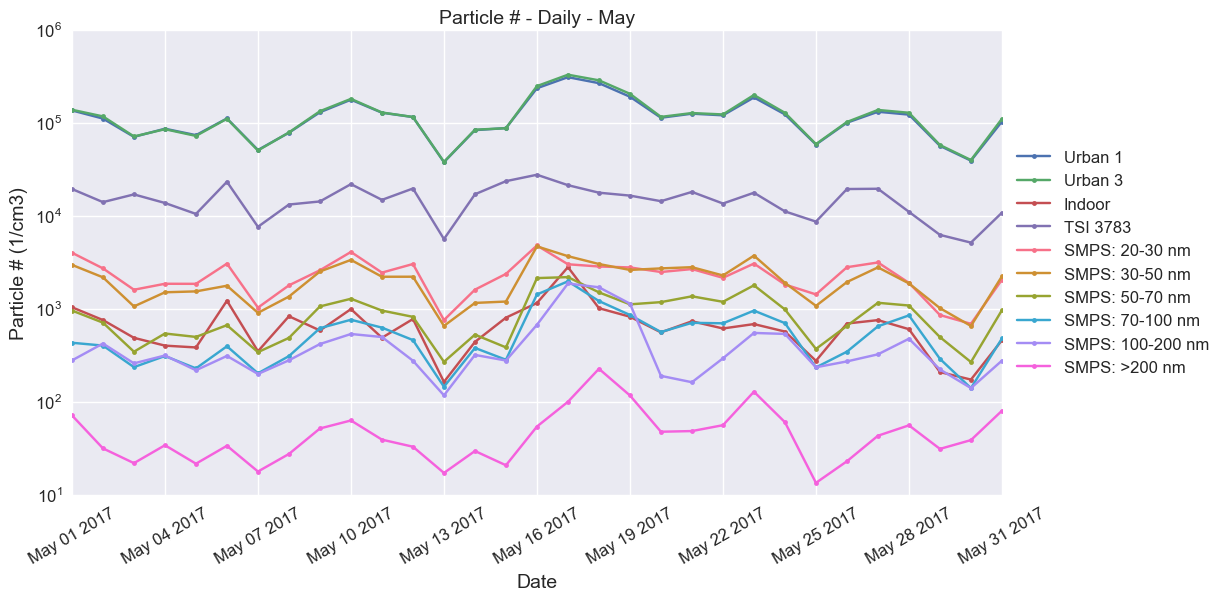

In [247]:
plt.figure(figsize=(12,6))
plt.semilogy(df_daily_may['time'],df_daily_may['pn-1'],'.-',label='Urban 1')
plt.semilogy(df_daily_may['time'],df_daily_may['pn-2'],'.-',label='Urban 3')
plt.semilogy(df_daily_may['time'],df_daily_may['i-pn'],'.-',label='Indoor')
plt.semilogy(df_daily_may['time'],df_daily_may['PN (#/cm3)'],'.-',label='TSI 3783')
plt.semilogy(df_daily_may['time'],df_daily_may['ch1'],'.-',color=colorz[0],label='SMPS: 20-30 nm')
plt.semilogy(df_daily_may['time'],df_daily_may['ch2'],'.-',color=colorz[1],label='SMPS: 30-50 nm')
plt.semilogy(df_daily_may['time'],df_daily_may['ch3'],'.-',color=colorz[2],label='SMPS: 50-70 nm')
plt.semilogy(df_daily_may['time'],df_daily_may['ch4'],'.-',color=colorz[5],label='SMPS: 70-100 nm')
plt.semilogy(df_daily_may['time'],df_daily_may['ch5'],'.-',color=colorz[6],label='SMPS: 100-200 nm')
plt.semilogy(df_daily_may['time'],df_daily_may['ch6'],'.-',color=colorz[7],label='SMPS: >200 nm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Particle # - Daily - May',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Particle # (1/cm3)',fontsize=14)